In [1]:
import cv2
import matplotlib.pyplot as plt

In [14]:
# Read in image and convert to grayscale
img_1 = cv2.imread('1.jpg')
img_2 = img_1.copy()
img_gray = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)
# Blue the image to soften it
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
# This creates a threshold for the foreground and background
threshold = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
counts=cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(counts)==2:
    counts=counts[0]
else:
    counts=counts[1]

for c in counts:
    area = cv2.contourArea(c)
    # Adjusting area adjusts the sensitivity of the contours
    # The lower area threshold, the more sensitive
    if area > 5000:
        cv2.drawContours(img_2, [c], -1, (0,255,0), 3)

cv2.imwrite('threshold.png', threshold)
cv2.imwrite('image.png', img_2)

True

[Text(0.5, 1.0, 'Output Image')]

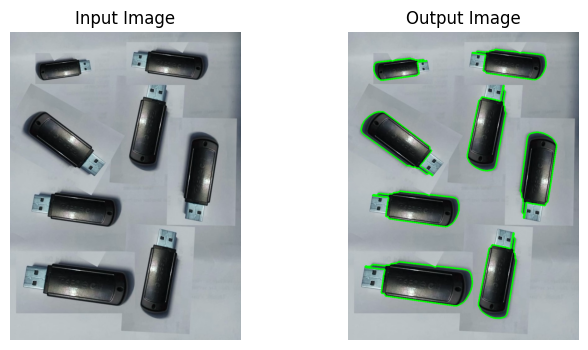

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img_1)
ax1.set(title='Input Image')

ax2.axis('off')
ax2.imshow(img_2)
ax2.set(title='Output Image')